# load in detrended LCs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def determine_cadence(times):
    time_gaps = {}
    for ii in range(1, len(times)):
        time_gap = np.round(times[ii]-times[ii-1], 4)
        if time_gap in time_gaps.keys():
            time_gaps[time_gap] += 1
        else:
            time_gaps[time_gap] = 1
            
    #find the key that corresponds to the most data gaps, this is the cadence
    cadence = max(time_gaps, key=time_gaps.get)
    return cadence
            
        

In [3]:
import matplotlib 
matplotlib.rc('xtick', labelsize=27) 
matplotlib.rc('ytick', labelsize=27) 

# load in the t0s
trans_inds = [0,1,3,4,5,6,7,8,29,31]
t0 = 277.504085
period = 160.88414
duration = 10.7536
depth = 0.006 #approx



t0s = []
for epoch in trans_inds:
    t0s.append(t0 + period*epoch)
    
t0s = np.array(t0s)    

print(t0s)

[ 277.504085  438.388225  760.156505  921.040645 1081.924785 1242.808925
 1403.693065 1564.577205 4943.144145 5264.912425]


In [4]:
Kepler = pd.read_csv('mm_kipping_kepler.dat', delimiter='\t', header=None, names=['time', 'flux', 'flux_err'])

TESS = pd.read_csv('mm_kipping_tess.dat', delimiter=' ', header=None, names=['time', 'flux', 'flux_err'])
#BARON = pd.read_csv('mm_kipping_baron.dat', delimiter='\t', header=None, names=['time', 'flux', 'flux_err'])
BARO = pd.read_csv(
    'Kepler1513_BARO_20220715_no-detrending.csv', 
    delimiter=',', skiprows=1, names=['time', 'flux', 'flux_err', 'airmass'])
BARON = pd.read_csv(
    'Kepler1513_BARON_20220715_no-detrending.csv', 
    delimiter=',', skiprows=1, names=['time', 'flux', 'flux_err', 'airmass'])



LCO = pd.read_csv(
    'June2obs/TIC394177315-11_20230602_LCO-Teid-1m0_ip_5px_KC_bjd-flux-err-fwhm-sky-detrended.dat', 
    delimiter='\t', skiprows=1, names=['time', 'flux', 'flux_err'])
Whitin = pd.read_csv(
    'June2obs/TIC394177315-11_UT20230602_Whitin_R.ap7_datasubset.dat',
    delimiter='\t', skiprows=1, names=['time','flux','flux_err','airmass'])



BARON['time'] -= 2454833
BARO['time'] -= 2454833
TESS['time']+= 2400000-2454833

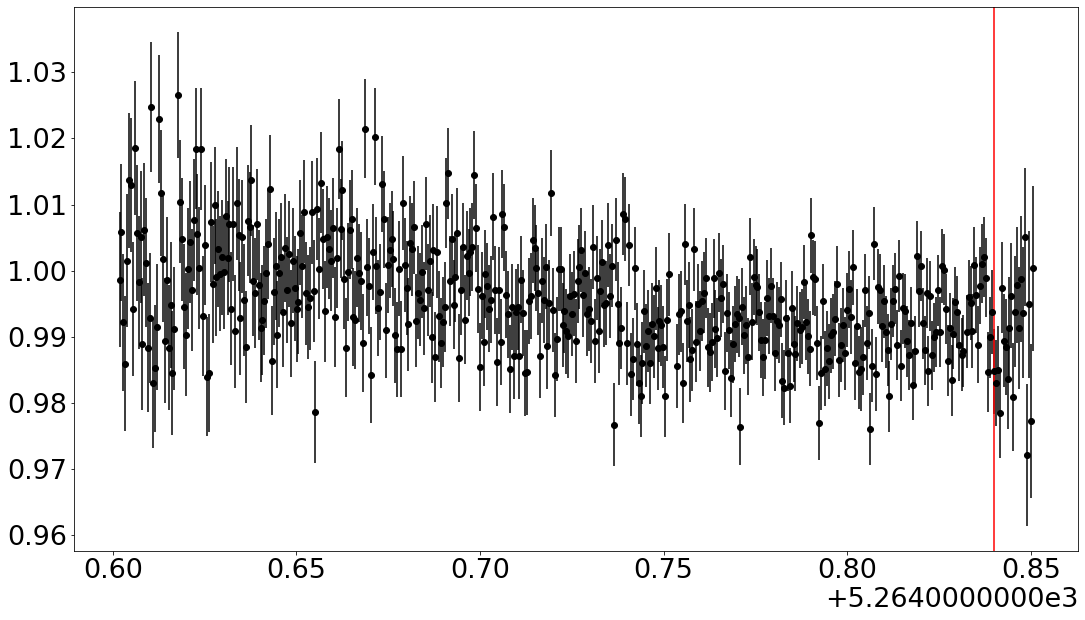

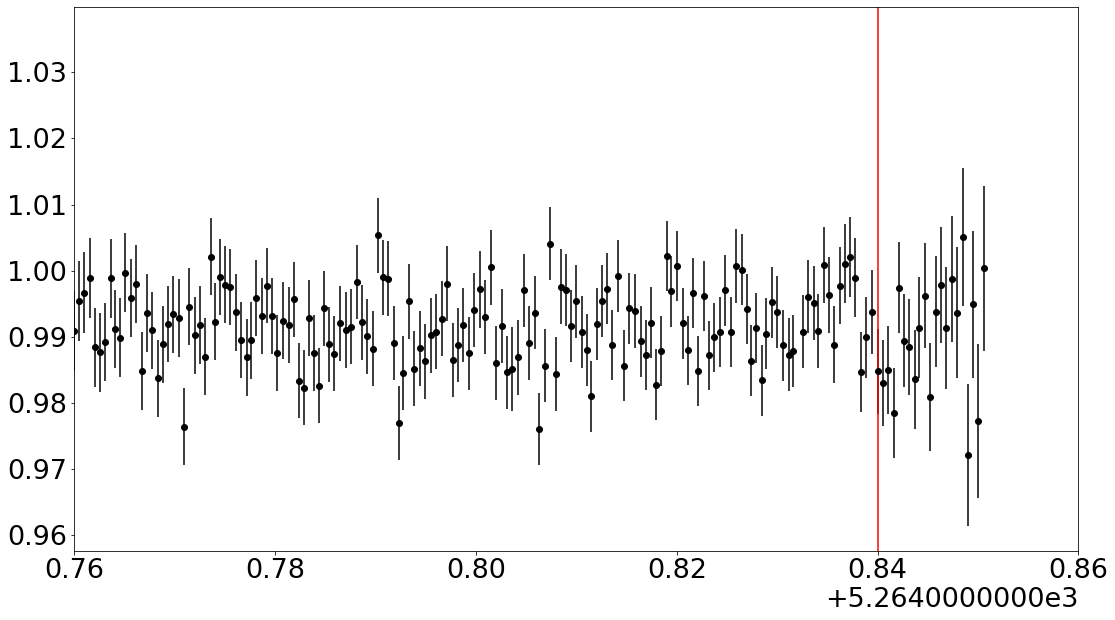

In [5]:
#From Kim McLeod at Whitin: 
#For the final fit, it might be worth cutting out the data at the end where the 
#positions begin to shift due to the rotator hitting its limit, 
#and then at the very end twilight appears in the sky counts.

plt.figure(figsize=[18,10])
plt.errorbar(Whitin['time']-2454833, Whitin['flux'], yerr=Whitin['flux_err'], marker='o', color='k', ls='')
plt.axvline(5264.84, 0, 1, color='r')

plt.figure(figsize=[18,10])
plt.errorbar(Whitin['time']-2454833, Whitin['flux'], yerr=Whitin['flux_err'], marker='o', color='k', ls='')
plt.axvline(5264.84, 0, 1, color='r')
plt.xlim(5264.76, 5264.86)

#cutoff Whitin data after 2460097.84
#df.drop(df[df.score < 50].index, inplace=True)

Whitin_cut = Whitin.drop(Whitin[Whitin['time']>2460097.84].index)



In [6]:
from scipy.optimize import curve_fit

def line(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

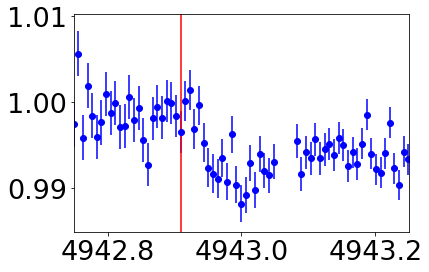

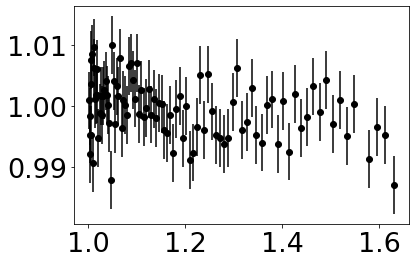

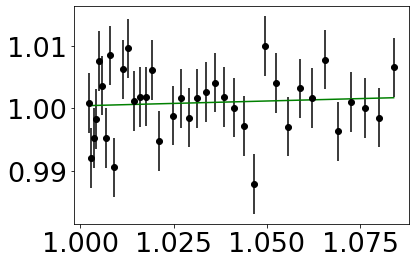

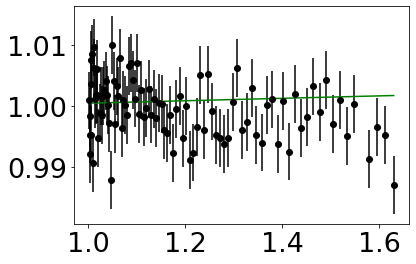

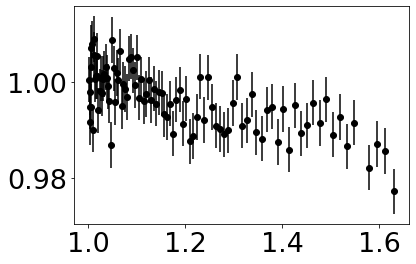

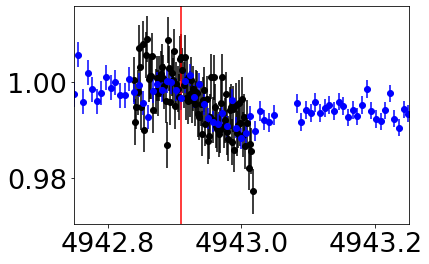

In [7]:
plt.errorbar(TESS['time'], TESS['flux'], TESS['flux_err'], color='b', ls='', marker='o')
#plt.errorbar(BARON['time'], BARON['flux'], BARON['flux_err'], color='k', ls='', marker='o')


ingress = 4942.91
plt.axvline(ingress, color='r')

plt.xlim(4942.75, 4943.25)

plt.show()



BARON_pre_ingress = BARON.loc[BARON['time'] < ingress]


plt.errorbar(BARON['airmass'], BARON['flux'], BARON['flux_err'], color='k', ls='', marker='o')
plt.show()



baron_line,_ = curve_fit(line, BARON_pre_ingress['airmass'], BARON_pre_ingress['flux'], sigma=BARON_pre_ingress['flux_err']) 


x_plot = np.linspace(np.min(BARON['airmass']), np.max(BARON['airmass']), 100)
x_plot_pre_ingress = np.linspace(np.min(BARON_pre_ingress['airmass']), np.max(BARON_pre_ingress['airmass']), 100)

line_plot = line(x_plot, baron_line[0], baron_line[1])
line_plot = line(x_plot_pre_ingress, baron_line[0], baron_line[1])

line_fit = line(BARON['airmass'], baron_line[0], baron_line[1])


plt.errorbar(BARON_pre_ingress['airmass'], BARON_pre_ingress['flux'], BARON_pre_ingress['flux_err'], color='k', ls='', marker='o')
plt.plot(x_plot_pre_ingress, line_plot, 'g')


plt.show()

plt.errorbar(BARON['airmass'], BARON['flux'], BARON['flux_err'], color='k', ls='', marker='o')
plt.plot(x_plot, line_plot, 'g')


plt.show()
plt.figure()
baron_flux_detrended_airmass = BARON['flux']/line_fit
plt.errorbar(BARON['airmass'], baron_flux_detrended_airmass, BARON['flux_err'], color='k', ls='', marker='o')



plt.show()



plt.errorbar(BARON['time'], baron_flux_detrended_airmass, yerr=BARON['flux_err'], marker='o', color='k', ls='')

plt.errorbar(TESS['time'], TESS['flux'], yerr=TESS['flux_err'], color='b', ls='', marker='o')

plt.axvline(ingress, color='r')

plt.xlim(4942.75, 4943.25)
plt.show()





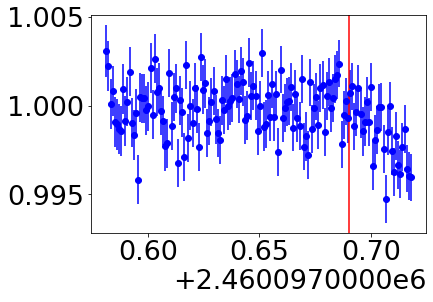

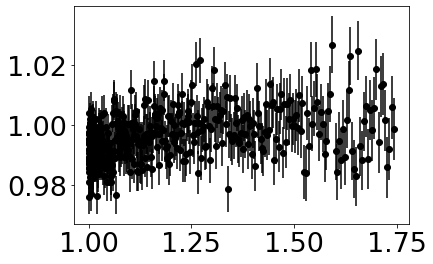

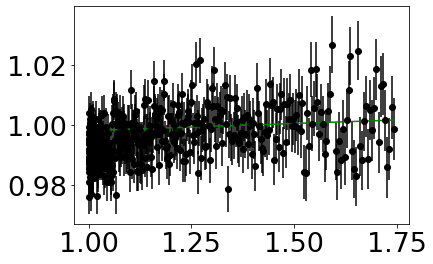

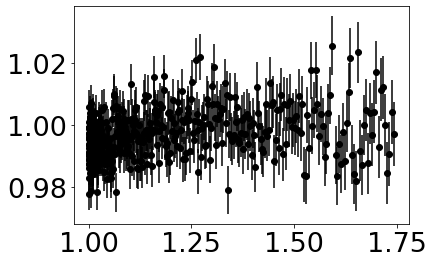

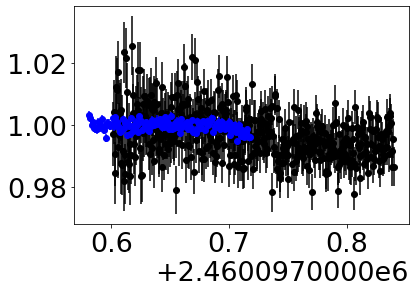

In [8]:
plt.errorbar(LCO['time'], LCO['flux'], yerr=LCO['flux_err'], color='b', ls='', marker='o')
plt.axvline(2460097.69, 0, 1, color='r')
plt.show()

plt.errorbar(Whitin_cut['airmass'], Whitin_cut['flux'], Whitin_cut['flux_err'], color='k', ls='', marker='o')
plt.show()

whitin_pre_ingress = Whitin_cut.loc[Whitin_cut['time'] < 2460097.69]

whitin_line,_ = curve_fit(line, whitin_pre_ingress['airmass'], whitin_pre_ingress['flux'], sigma=whitin_pre_ingress['flux_err']) 


x_plot = np.linspace(np.min(Whitin_cut['airmass']), np.max(Whitin_cut['airmass']), 100)

line_plot = line(x_plot, whitin_line[0], whitin_line[1])

line_fit = line(Whitin_cut['airmass'], whitin_line[0], whitin_line[1])


plt.errorbar(Whitin_cut['airmass'], Whitin_cut['flux'], Whitin_cut['flux_err'], color='k', ls='', marker='o')
plt.plot(x_plot, line_plot, 'g')


plt.show()

plt.figure()
whitin_flux_detrended_airmass = Whitin_cut['flux']/line_fit
plt.errorbar(Whitin_cut['airmass'], whitin_flux_detrended_airmass, Whitin_cut['flux_err'], color='k', ls='', marker='o')



plt.show()


plt.errorbar(Whitin_cut['time'], whitin_flux_detrended_airmass, yerr=Whitin_cut['flux_err'], marker='o', color='k', ls='')

plt.errorbar(LCO['time'], LCO['flux'], yerr=LCO['flux_err'], color='b', ls='', marker='o')


#plt.xlim(5262, 5264.91676768)
plt.show()





In [9]:
x_kepler, y_kepler, yerr_kepler = Kepler['time'].values+2400000-2454833, Kepler['flux'].values-1, Kepler['flux_err'].values

x_tess, y_tess, yerr_tess = TESS['time'].values, TESS['flux'].values-1, TESS['flux_err'].values
#x_baron, y_baron, yerr_baron = BARON['time'].values, BARON['flux'].values-1, BARON['flux_err'].values
x_baron, y_baron, yerr_baron = BARON['time'].values, baron_flux_detrended_airmass.values-1, BARON['flux_err'].values

x_lco, y_lco, yerr_lco = LCO['time'].values - 2454833., LCO['flux'].values-1, LCO['flux_err'].values
x_whitin, y_whitin, yerr_whitin = Whitin_cut['time'].values - 2454833., whitin_flux_detrended_airmass.values-1, Whitin_cut['flux_err'].values



In [10]:
from collections import OrderedDict

texp_kepler = determine_cadence(x_kepler)

texp_baron = determine_cadence(x_baron)
texp_tess = determine_cadence(x_tess)

texp_lco = determine_cadence(x_lco)
texp_whitin = determine_cadence(x_whitin)


datasets = OrderedDict(
    [
        ("Kepler", [x_kepler, y_kepler, yerr_kepler, texp_kepler]),
        ("BARON", [x_baron, y_baron, yerr_baron, texp_baron]),
        ("TESS", [x_tess, y_tess, yerr_tess, texp_tess]),
        ("LCO Teide", [x_lco, y_lco, yerr_lco, texp_lco]),
        ("Whitin", [x_whitin, y_whitin, yerr_whitin, texp_whitin])
    ]
)

print(t0s[0])
datasets

277.504085


OrderedDict([('Kepler',
              [array([ 274.79345151,  274.8138842 ,  274.8343168 , ..., 1567.2566749 ,
                      1567.27710926, 1567.29754371]),
               array([ 1.34591573e-04, -6.52068323e-05,  3.17914200e-05, ...,
                       8.26584553e-05, -6.51615510e-05, -2.65159057e-05]),
               array([9.84939350e-05, 9.82610940e-05, 9.80573755e-05, ...,
                      9.88612586e-05, 9.84045546e-05, 1.00742059e-04]),
               0.0204]),
             ('BARON',
              [array([4942.83959444, 4942.84140001, 4942.84321716, 4942.84502272,
                      4942.84681671, 4942.84862229, 4942.85042785, 4942.852245  ,
                      4942.85405057, 4942.85767328, 4942.85946728, 4942.86127285,
                      4942.86307842, 4942.86488398, 4942.86667798, 4942.86848355,
                      4942.87210626, 4942.87391183, 4942.87571741, 4942.8775114 ,
                      4942.87931697, 4942.88112254, 4942.8829281 , 4942.88474

In [11]:
for n, (name, (x, y, yerr, texp)) in enumerate(datasets.items()):
    df = pd.DataFrame(
        {'x': x,
         'y': y+1,
         'yerr': yerr
        })
    
    df.to_csv('./detrended_lcs/' + name + '.dat', index=False, header=False, sep='\t')

In [12]:
t0s

array([ 277.504085,  438.388225,  760.156505,  921.040645, 1081.924785,
       1242.808925, 1403.693065, 1564.577205, 4943.144145, 5264.912425])

In [13]:
#find reasonable limb darkening params for ground based obs
#𝑇eff = 5491 ± 100 [K]
#logg = 4.46 ± 0.10 [cgs]
#[Fe/H] = 0.17 ± 0.06

limb_darkening = pd.read_csv('claret_limb_darkening.tsv', delimiter='\t', skiprows=39)


#limit by logg
limb_darkening = limb_darkening.loc[limb_darkening['logg [cm/s2]'] > 4.46-.1]
limb_darkening = limb_darkening.loc[limb_darkening['logg [cm/s2]'] < 4.46+.1]

#limit by Teff
limb_darkening = limb_darkening.loc[limb_darkening['Teff [K]'] > 5491-100]
limb_darkening = limb_darkening.loc[limb_darkening['Teff [K]'] < 5491+100]
limb_darkening

#limit by fe/h
limb_darkening = limb_darkening.loc[limb_darkening['Z [Sun]'] > 0.17-0.06]
limb_darkening = limb_darkening.loc[limb_darkening['Z [Sun]'] < 0.17+0.06]
limb_darkening

#BARON observed in R band
BARON_limb_darkening = limb_darkening.loc[limb_darkening['Filt'] == 'i*']
BARON_u1 = float(BARON_limb_darkening['a'].values)
BARON_u2 = float(BARON_limb_darkening['b'].values)
print('BARON')
print(BARON_u1, BARON_u2)
print('')

#LCO observed in ip band
LCO_limb_darkening = limb_darkening.loc[limb_darkening['Filt'] == 'i*']
LCO_u1 = float(LCO_limb_darkening['a'].values)
LCO_u2 = float(LCO_limb_darkening['b'].values)
print('LCO')
print(LCO_u1, LCO_u2)
print('')

#Whitin observed in R band
Whitin_limb_darkening = limb_darkening.loc[limb_darkening['Filt'] == 'R ']
Whitin_u1 = float(Whitin_limb_darkening['a'].values)
Whitin_u2 = float(Whitin_limb_darkening['b'].values)
print('Whitin')
print(Whitin_u1, Whitin_u2)
print('')


BARON
0.381 0.2272

LCO
0.381 0.2272

Whitin
0.4498 0.2232



In [14]:
import pymc3 as pm
import pymc3_ext as pmx
import exoplanet as xo
import aesara_theano_fallback.tensor as tt
from functools import partial
from celerite2.theano import terms, GaussianProcess
import theano




# Find a reference transit time near the middle of the observations to avoid
# strong covariances between period and t0
x_min = min(np.min(x) for x, _, _, _ in datasets.values())
x_max = max(np.max(x) for x, _, _, _ in datasets.values())
x_mid = 0.5 * (x_min + x_max)

mid_epoch = np.round((x_mid) / period)
t0_ref = period * np.round((x_mid - t0s[0]) / period)


with pm.Model() as model:

    # Shared orbital parameters --> impact parameter, transit times, stellar density
    ###########################
    ###########################
    ###########################
    #stellar density
    log_rho_star = pm.Uniform('log_rho_star', lower=-3, upper=3)
    rho_star = pm.Deterministic('rho_star', tt.exp(log_rho_star))
    
    # impact parameter
    b = pm.Uniform("b", lower=0, upper=2)

    
    # Now we have a parameter for each transit time for each planet:
    transit_times = []
    for i in range(1):
        transit_times.append(
            pm.Uniform(
                "tts_{0}".format(i),
                lower=t0s-1,
                upper=t0s+1,
                shape=len(t0s),
            )
        )

        
    # Now we have a parameter for each transit time for each planet:
    transit_inds = pm.Deterministic("transit_inds", tt.constant(trans_inds))
    
    
    
    
    # Set up an orbit for the planet
    orbit = xo.orbits.TTVOrbit(b=b, transit_times=transit_times, 
                               rho_star=rho_star, transit_inds=[transit_inds])
    
    #rp_over_rstar 
    ror = pm.Uniform('ror', lower=0, upper=1)
    
    #fix r_star = 1, then can solve for rp/rstar after
    r_star = 1.
    r_pl = pm.Deterministic("r_pl", ror * r_star)
    
    
    
    # It will be useful later to track some parameters of the orbit
    pm.Deterministic("t0", orbit.t0)
    pm.Deterministic("period", orbit.period)
    pm.Deterministic("ttvs_{0}".format(i), orbit.ttvs[i])
    
    




    # not shared parameters --> depth and limb-darkening
    # Loop over the instruments
    parameters = dict()
    lc_models = dict()
    for n, (name, (x, y, yerr, texp)) in enumerate(datasets.items()):
        # We define the per-instrument parameters in a submodel so that we
        # don't have to prefix the names manually
        with pm.Model(name=name, model=model):
            
            #if groundbased, assume a claret limb-darkening
            if name == 'BARON':
                u1, u2 = BARON_u1, BARON_u2
            elif name == 'LCO Teide':
                u1, u2 = LCO_u1, LCO_u2
            elif name == 'Whitin':
                u1, u2 = Whitin_u1, Whitin_u2
            
            # Else, use the limb darkening from equations 15-19 in Kipping 2013
            # https://arxiv.org/pdf/1308.0009.pdf
            else:
                q1 = pm.Uniform('q1', lower=0., upper=1.)
                q2 = pm.Uniform('q2', lower=0., upper=1.)
            
            
            
                u1 = pm.Deterministic('u1', 2*tt.sqrt(q1)*q2)
                u2 = pm.Deterministic('u2', tt.sqrt(q1)*(1-(2*q2)))

            star = xo.LimbDarkLightCurve(u1=u1, u2=u2)
            

            
            #jitter term
            #med_yerr = np.median(yerr)
            #std = np.std(y)
            #jitter = pm.InverseGamma(
            #    "jitter",
            #    testval=med_yerr,
            #    **pmx.estimate_inverse_gamma_parameters(
            #        med_yerr, 0.5 * std
            #    ),
            #)
                
                
            #add TESS blend facotr
            if name == 'TESS':
                log_blend = pm.Uniform('log_blend', lower=tt.log(1), upper=tt.log(10), testval=tt.log(1.01))
                blend = pm.Deterministic('blend', tt.exp(log_blend))
                y = (y+1)/blend - 1
            
    

            # Keep track of the parameters for optimization
            if name == 'TESS':
                parameters[name] = [q1, q2, r_pl, blend]
            elif name == 'Kepler':
                parameters[name] = [q1, q2, r_pl]
            else:
                parameters[name] = [r_pl]
            

        # The light curve model
        def lc_model(star, r_pl, texp, t):
            return pm.math.sum(
                star.get_light_curve(orbit=orbit, r=r_pl*r_star, t=t, texp=texp),
                axis=-1,
            )

        lc_model_partial = partial(lc_model, star, r_pl, texp)
        lc_models[name] = lc_model_partial
        
        lc_model_obs = lc_model(star, r_pl, texp, x)
        pm.Normal(f"{name}_obs", mu=lc_model_obs, sd=np.sqrt(yerr**2.), observed=y)



    # Optimize the model
    map_soln = model.test_point
    #for name in ['Kepler', 'TESS']:
    #    map_soln = pmx.optimize(map_soln, parameters[name])
    for name in ['Kepler']:
        map_soln = pmx.optimize(map_soln, parameters[name] + [b])
    map_soln = pmx.optimize(map_soln)

optimizing logp for variables: [b, ror, Kepler_q2, Kepler_q1]


message: Desired error not necessarily achieved due to precision loss.
logp: -29372444.950537797 -> -140567.9058562705
optimizing logp for variables: [TESS_log_blend, TESS_q2, TESS_q1, Kepler_q2, Kepler_q1, ror, tts_0, b, log_rho_star]


message: Optimization terminated successfully.
logp: -140567.9058562705 -> 33686.17627041741


In [15]:
transit_times_map = map_soln['tts_0']
blend_tess_map = map_soln['TESS_blend']
period_map = map_soln['period']

print(transit_times_map)
print(blend_tess_map)
print(period_map)


#print('')
#print('')
#print('')
#for n, (name, (x, y, yerr, texp)) in enumerate(datasets.items()):
#    print(name)
#    print('median yerr: ' + str(np.median(yerr)))
#    print('jitter: ' + str(map_soln[name+'_jitter']))
#    print('')


[ 277.50562999  438.38775041  760.15460137  921.04576273 1081.92944335
 1242.80899521 1403.70185123 1564.57760713 4943.13846298 5264.91789791]
1.0000681291311448
[160.88408499]


In [43]:
map_soln

{'log_rho_star_interval__': array(0.16575784),
 'b_interval__': array(-2.46120182),
 'tts_0_interval__': array([ 0.00308999, -0.00094917, -0.00380727,  0.01023556,  0.00931677,
         0.00014041,  0.01757292,  0.00080427, -0.01136416,  0.01094594]),
 'ror_interval__': array(-2.45683666),
 'Kepler_q1_interval__': array(-0.22483122),
 'Kepler_q2_interval__': array(-0.71791043),
 'TESS_q1_interval__': array(-1.98368342),
 'TESS_q2_interval__': array(-1.26293461),
 'TESS_log_blend_interval__': array(-10.4281426),
 'log_rho_star': array(0.24806903),
 'rho_star': array(1.28154839),
 'b': array(0.15724646),
 'tts_0': array([ 277.50562999,  438.38775041,  760.15460137,  921.04576273,
        1081.92944335, 1242.80899521, 1403.70185123, 1564.57760713,
        4943.13846298, 5264.91789791]),
 'transit_inds': array([ 0,  1,  3,  4,  5,  6,  7,  8, 29, 31]),
 'ror': array(0.07894003),
 'r_pl': array(0.07894003),
 't0': array([277.50640136]),
 'period': array([160.88408499]),
 'ttvs_0': array([-0

# load in posterior

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

posterior = az.from_netcdf('./transit_model_final_posterior.out')
posterior

Inference data with groups:
	> posterior

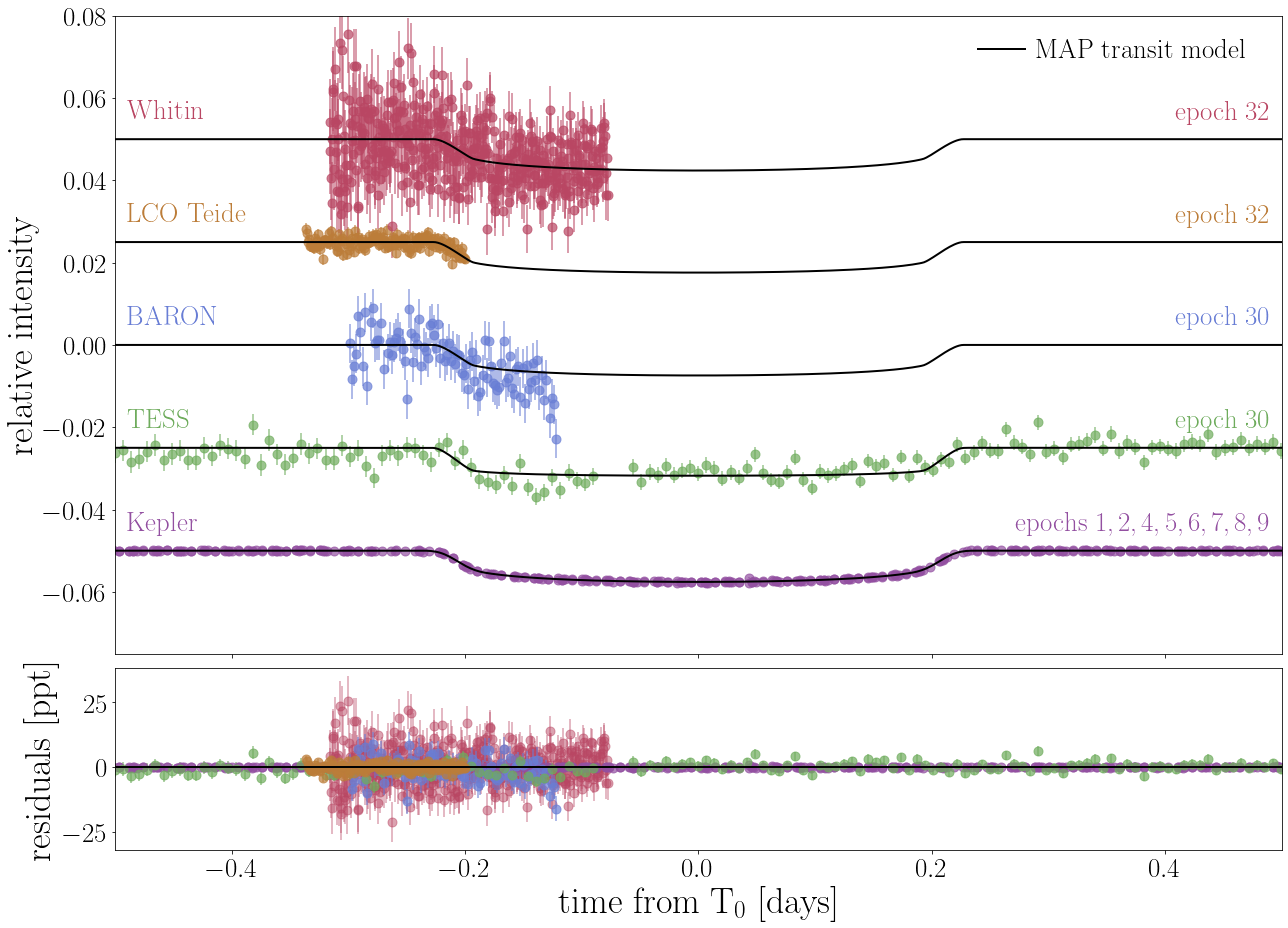

In [17]:
import matplotlib
matplotlib.rc('xtick', labelsize=27) 
matplotlib.rc('ytick', labelsize=27) 
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)

dt = np.linspace(-.5, .5, 500)


#colors = ["#2E2252", "#ab0048", "#723c87", '#2E5090', '#5164ff']
#colors = ["#b30000", "#4421af", "#7c1158", "#1a53ff", "#0d88e6"]
colors = ["#9350a1", "#697ed5", "#6fac5d", "#bc7d39", "#b94663"]
fig, ax = plt.subplots(2, figsize = [18,13], gridspec_kw={'height_ratios': [7, 2]}, sharex=True)

index = 0

shifts = [-0.05, 0., -0.025, 0.025, 0.05]
#trans_inds = [0,1,3,4,5,6,7,8,29,31]
epochs_labels = ['epochs 1,\,2,\,4,\,5,\,6,\,7,\,8,\,9', 
                 'epoch 30', 'epoch 30', 'epoch 32', 'epoch 32']
with model:
    
    
    for n, (name, (x, y, yerr, texp)) in enumerate(datasets.items()):
        phase_curve = pmx.eval_in_model(
                lc_models[name](transit_times_map[0] + dt), map_soln)
        
        phase_curve_for_resid = pmx.eval_in_model(
                lc_models[name](x), map_soln)
        
        t_warp = pmx.eval_in_model(orbit._warp_times(x), map_soln)
        
        
        #jitter = map_soln[name+'_jitter']
        #error = np.sqrt(yerr**2.+jitter**2.)
        
        if name == 'TESS':
                y = (y+1)/blend_tess_map - 1

        # Get the map period for plotting purposes
        p = period_map

        # Plot the folded data
        x_fold = (t_warp + 0.5 * p) % p - 0.5 * p
        ax[0].errorbar(
            x_fold, y+shifts[index], yerr=yerr, ms=9,
            marker='o', ls='', color=colors[index], zorder=-1000, alpha=0.7
        )


        ax[0].text(-0.49, shifts[index]+.005, name, fontsize = 27, color=colors[index])
        ax[0].text(0.49, shifts[index]+.005, epochs_labels[index], 
                 fontsize = 27, color=colors[index], horizontalalignment= 'right')




        ax[0].plot(dt, phase_curve+shifts[index], color='k', lw=2)
        
        
        
        if name == 'Whitin':
            ax[1].errorbar(
                x_fold, (y-phase_curve_for_resid)*1000, yerr=yerr*1000., ms=9,
                marker='o', ls='', color=colors[index], zorder=-5000, alpha=0.5
            )
        else:
            ax[1].errorbar(
                x_fold, (y-phase_curve_for_resid)*1000, yerr=yerr*1000., ms=9,
                marker='o', ls='', color=colors[index], zorder=-1000, alpha=0.7
            )

        ax[1].axhline(0, 0, 1, color='k', lw=2)

        index+=1
    
    
ax[0].axhline(0.072, 0.74, 0.78, color = 'k', lw=2)   
ax[0].text(0.47, 0.07, 'MAP transit model', fontsize = 27, color='k', horizontalalignment= 'right')
ax[0].set_xlim(-0.5, 0.5)
ax[0].set_ylim(-0.075, 0.08)
ax[0].set_ylabel("relative intensity", fontsize = 36)


#handles, labels = fig.gca().get_legend_handles_labels()
#by_label = dict(zip(labels, handles))
#ax[0].legend(by_label.values(), by_label.keys(), fontsize=23, loc=1)





ax[1].set_xlim(-0.5, 0.5)

ax[1].set_ylabel("residuals [ppt]", fontsize = 36)
ax[1].set_xlabel(r"time from $\textrm{T}_0$ [days]", fontsize = 36)


fig.tight_layout()
fig.savefig('transit_model_map.pdf')
    

plt.show()

In [18]:
with model:
    trace = pmx.sample(
        tune=2000,
        draws=2000,
        start=map_soln,
        cores=2,
        chains=2,
        target_accept=.99,
        return_inferencedata=True,
    )

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [TESS_log_blend, TESS_q2, TESS_q1, Kepler_q2, Kepler_q1, ror, tts_0, b, log_rho_star]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 1449 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 16 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


In [19]:
import arviz as az

az.summary(trace,var_names=[
    "ror",
    "rho_star",
    "b",
    "Kepler_q1",
    "Kepler_q2",
    "TESS_q1",
    "TESS_q2",
    "TESS_blend",
    "tts_0",
    "t0",
    "period",
        ])

mean     sd    hdi_3%   hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
ror            0.079  0.000     0.078     0.079      0.000    0.000    1024.0   
rho_star       1.292  0.038     1.214     1.339      0.001    0.001    1048.0   
b              0.114  0.074     0.000     0.244      0.003    0.002     804.0   
Kepler_q1      0.453  0.040     0.379     0.528      0.001    0.001    1882.0   
Kepler_q2      0.325  0.029     0.269     0.378      0.001    0.000    2449.0   
TESS_q1        0.126  0.123     0.000     0.354      0.002    0.001    4060.0   
TESS_q2        0.280  0.245     0.000     0.774      0.004    0.003    4201.0   
TESS_blend     1.000  0.000     1.000     1.000      0.000    0.000    2907.0   
tts_0[0]     277.506  0.000   277.505   277.506      0.000    0.000    3999.0   
tts_0[1]     438.388  0.000   438.387   438.389      0.000    0.000    3996.0   
tts_0[2]     760.155  0.000   760.154   760.155      0.000    0.000    4131.0   
tts_0[3]     921.046  0.000   921.045   921.046      0.000    0.000    4101.0   
tts_0[4]    1081.929  0.000  1081.929  1081.930      0.000    0.000    3997.0   
tts_0[5]    1242.809  0.000  1242.808  1242.810      0.000    0.000    4762.0   
tts_0[6]    1403.702  0.000  1403.701  1403.703      0.000    0.000    4115.0   
tts_0[7]    1564.578  0.000  1564.577  1564.578      0.000    0.000    3708.0   
tts_0[8]    4943.138  0.004  4943.132  4943.145      0.000    0.000    3503.0   
tts_0[9]    5264.918  0.002  5264.915  5264.921      0.000    0.000    3559.0   
t0[0]        277.506  0.000   277.506   277.507      0.000    0.000    4031.0   
period[0]    160.884  0.000   160.884   160.884      0.000    0.000    3566.0   

            ess_tail  r_hat  
ror            660.0    1.0  
rho_star       660.0    1.0  
b              638.0    1.0  
Kepler_q1     2075.0    1.0  
Kepler_q2     2006.0    1.0  
TESS_q1       2202.0    1.0  
TESS_q2       2509.0    1.0  
TESS_blend    1478.0    1.0  
tts_0[0]      2702.0    1.0  
tts_0[1]      2784.0    1.0  
tts_0[2]      2851.0    1.0  
tts_0[3]      2711.0    1.0  
tts_0[4]      2862.0    1.0  
tts_0[5]      2795.0    1.0  
tts_0[6]      2637.0    1.0  
tts_0[7]      2518.0    1.0  
tts_0[8]      2202.0    1.0  
tts_0[9]      2506.0    1.0  
t0[0]         2733.0    1.0  
period[0]     2362.0    1.0

/var/folders/9z/bcj7jltn3x5_8y20r9cxql3h0000gn/T/ipykernel_8019/4285621564.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern


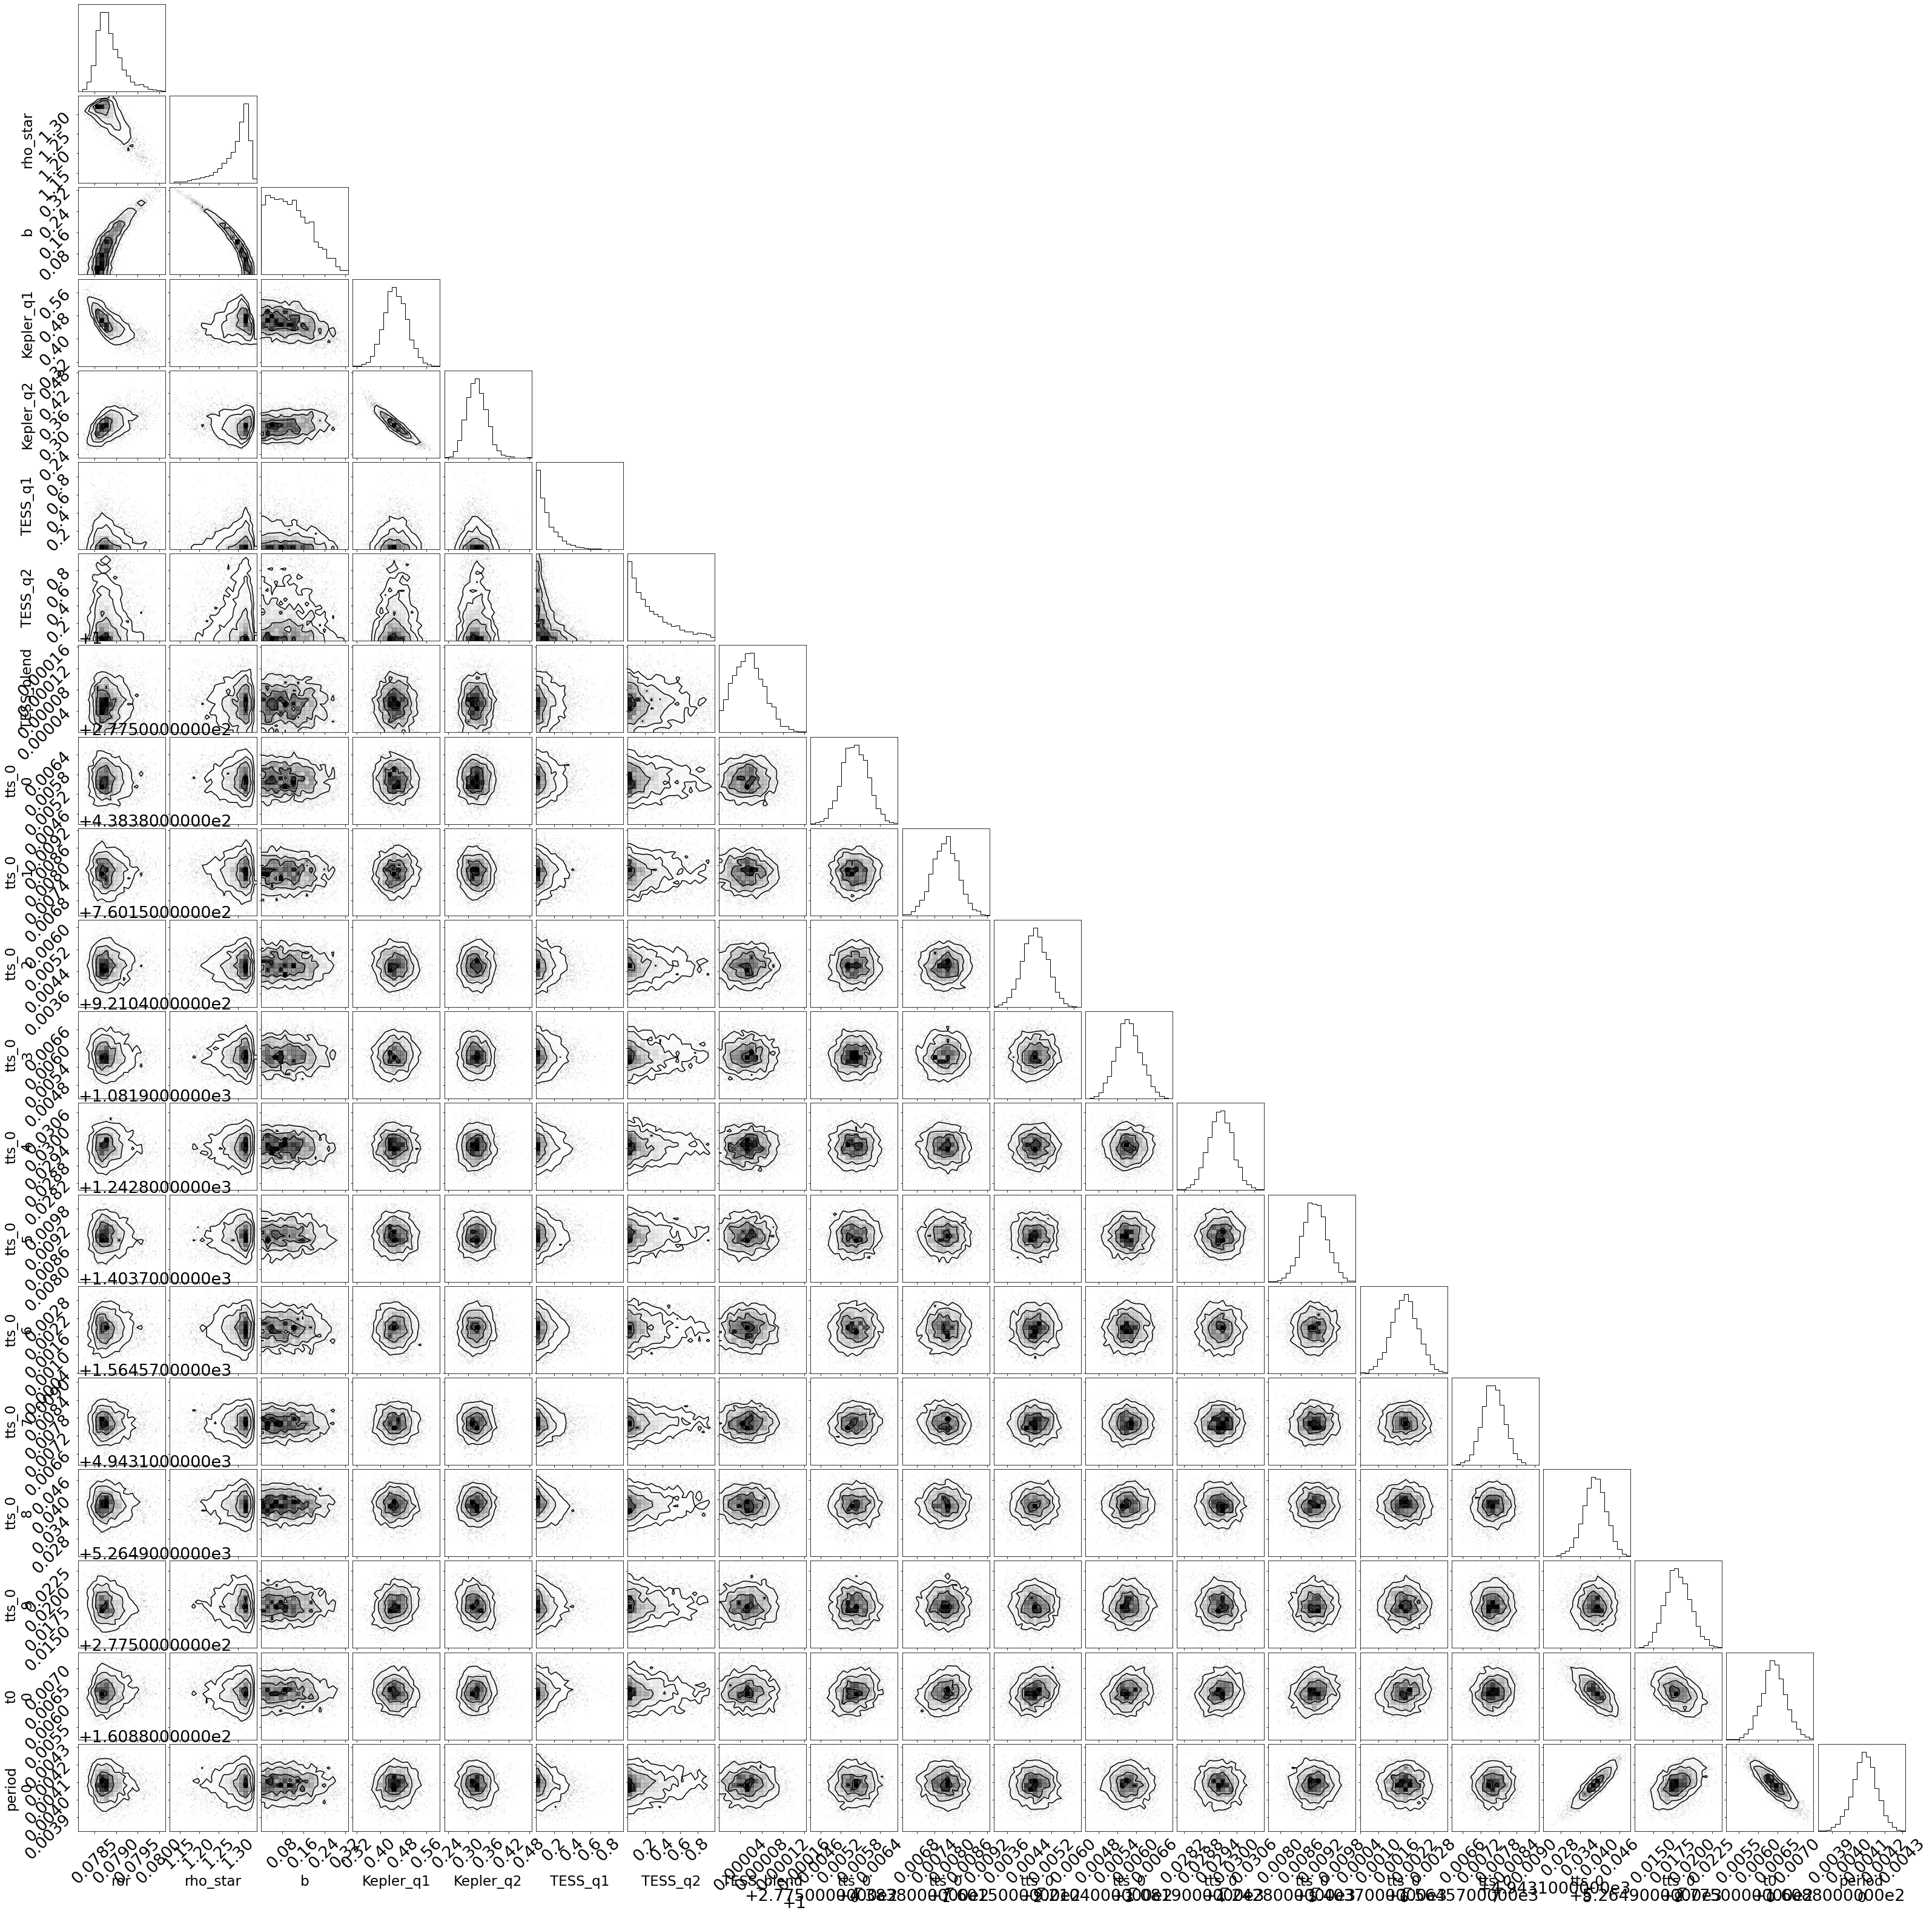

In [20]:
import corner
import matplotlib 
matplotlib.rc('text', usetex=False)


names = ["ror",
    "rho_star",
    "b",
    "Kepler_q1",
    "Kepler_q2",
    "TESS_q1",
    "TESS_q2",
    "TESS_blend",
    "tts_0",
    "t0",
    "period"]

corner.corner(
    trace,
    var_names=names,
    label_kwargs={'fontsize':23}, labelpad=0.2
)



fig.show()

/var/folders/9z/bcj7jltn3x5_8y20r9cxql3h0000gn/T/ipykernel_8019/3897022596.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


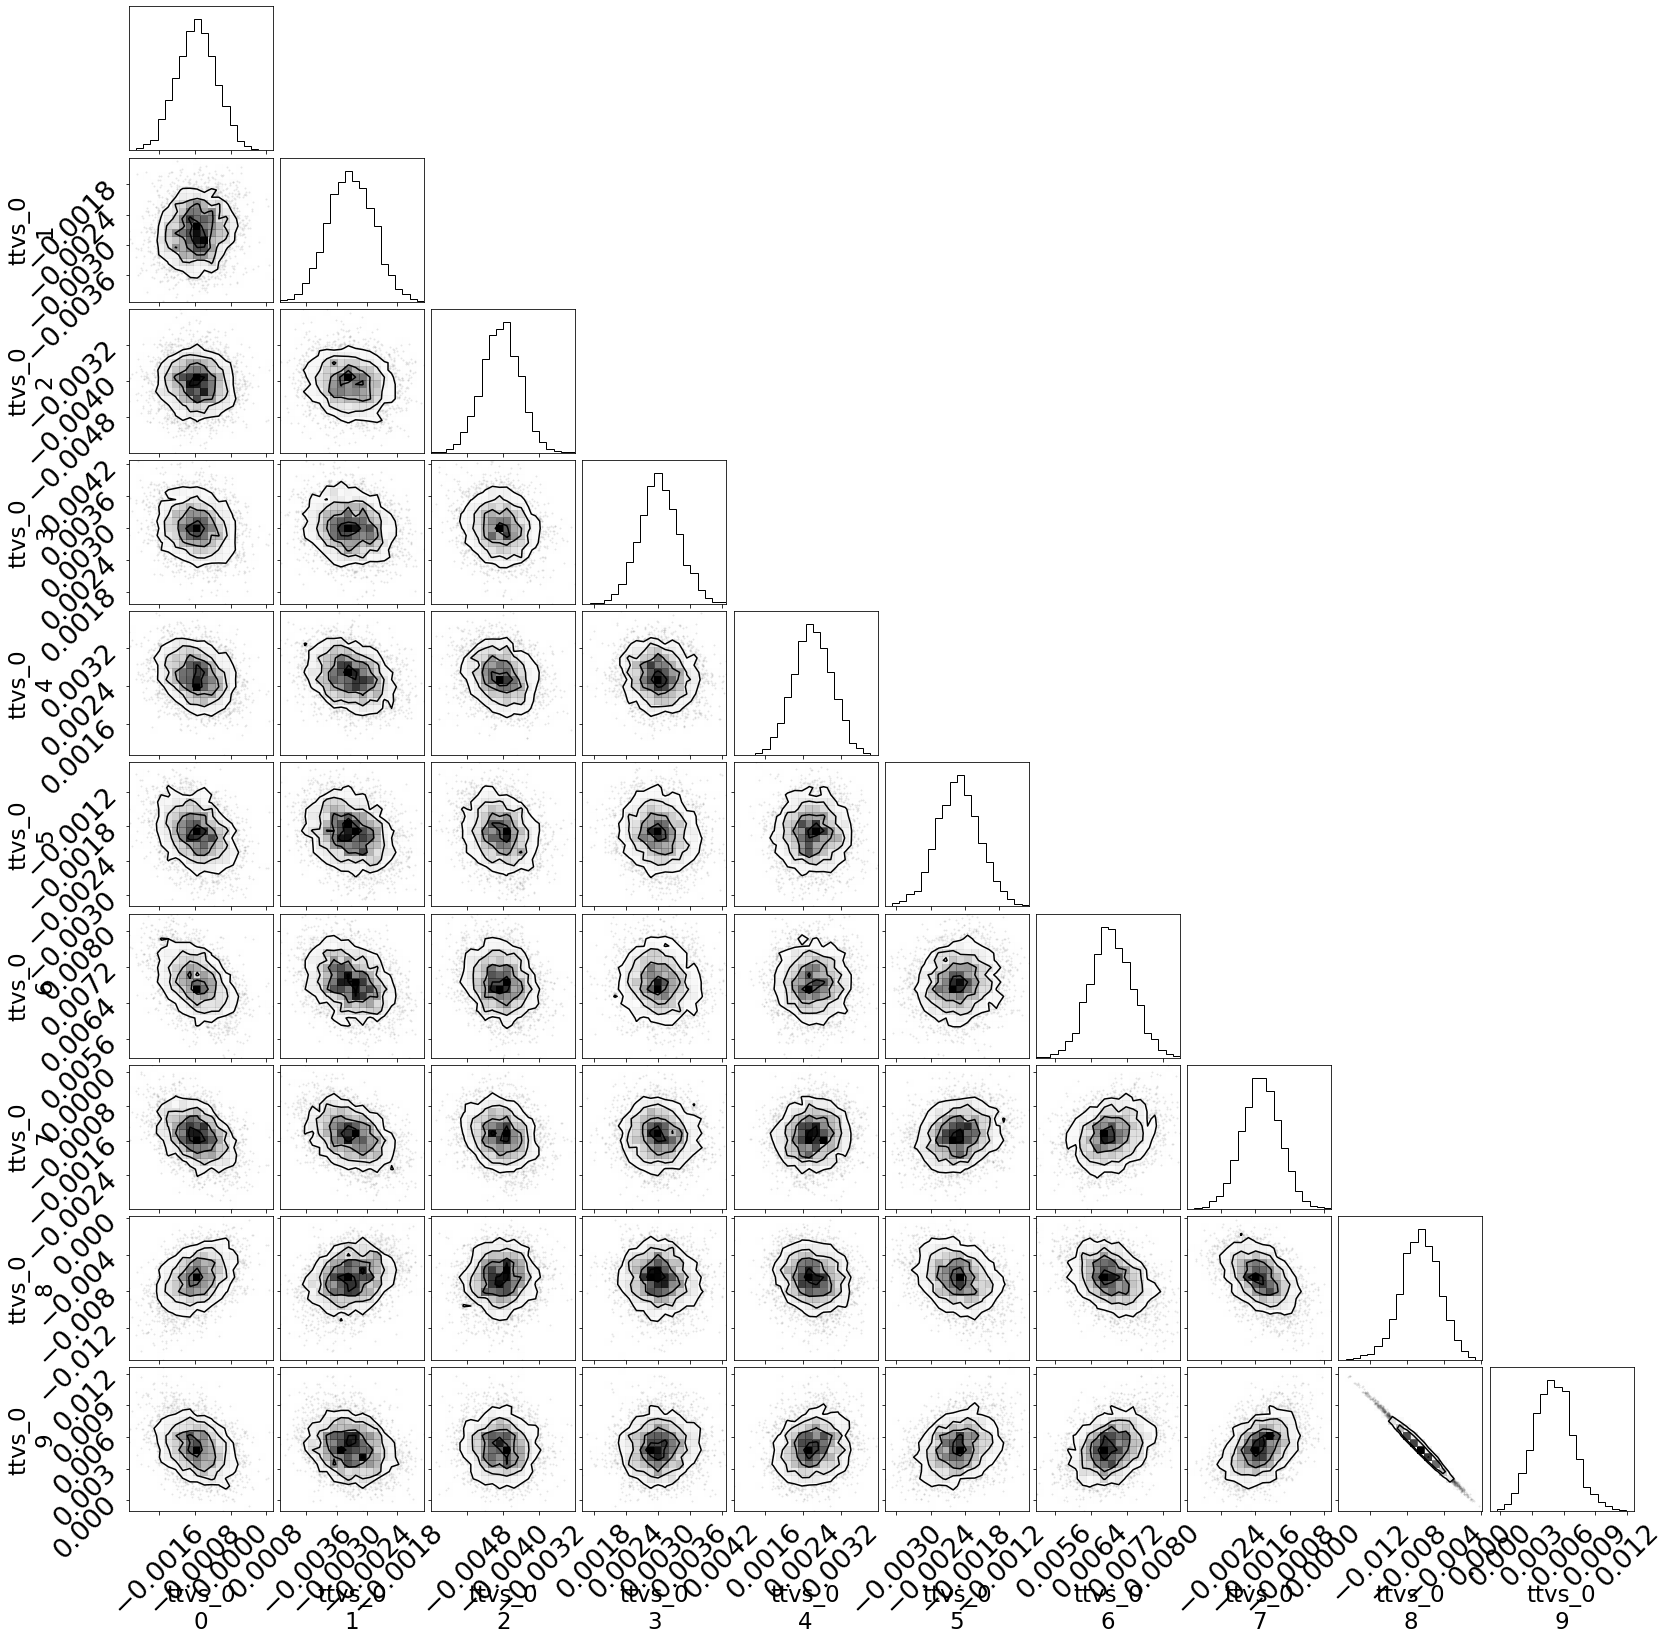

In [21]:
import corner
import matplotlib 
matplotlib.rc('text', usetex=False)


names = ["ttvs_0"]

corner.corner(
    trace,
    var_names=names,
    label_kwargs={'fontsize':23}, labelpad=0.2
)


fig.show()

/var/folders/9z/bcj7jltn3x5_8y20r9cxql3h0000gn/T/ipykernel_8019/2054078320.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


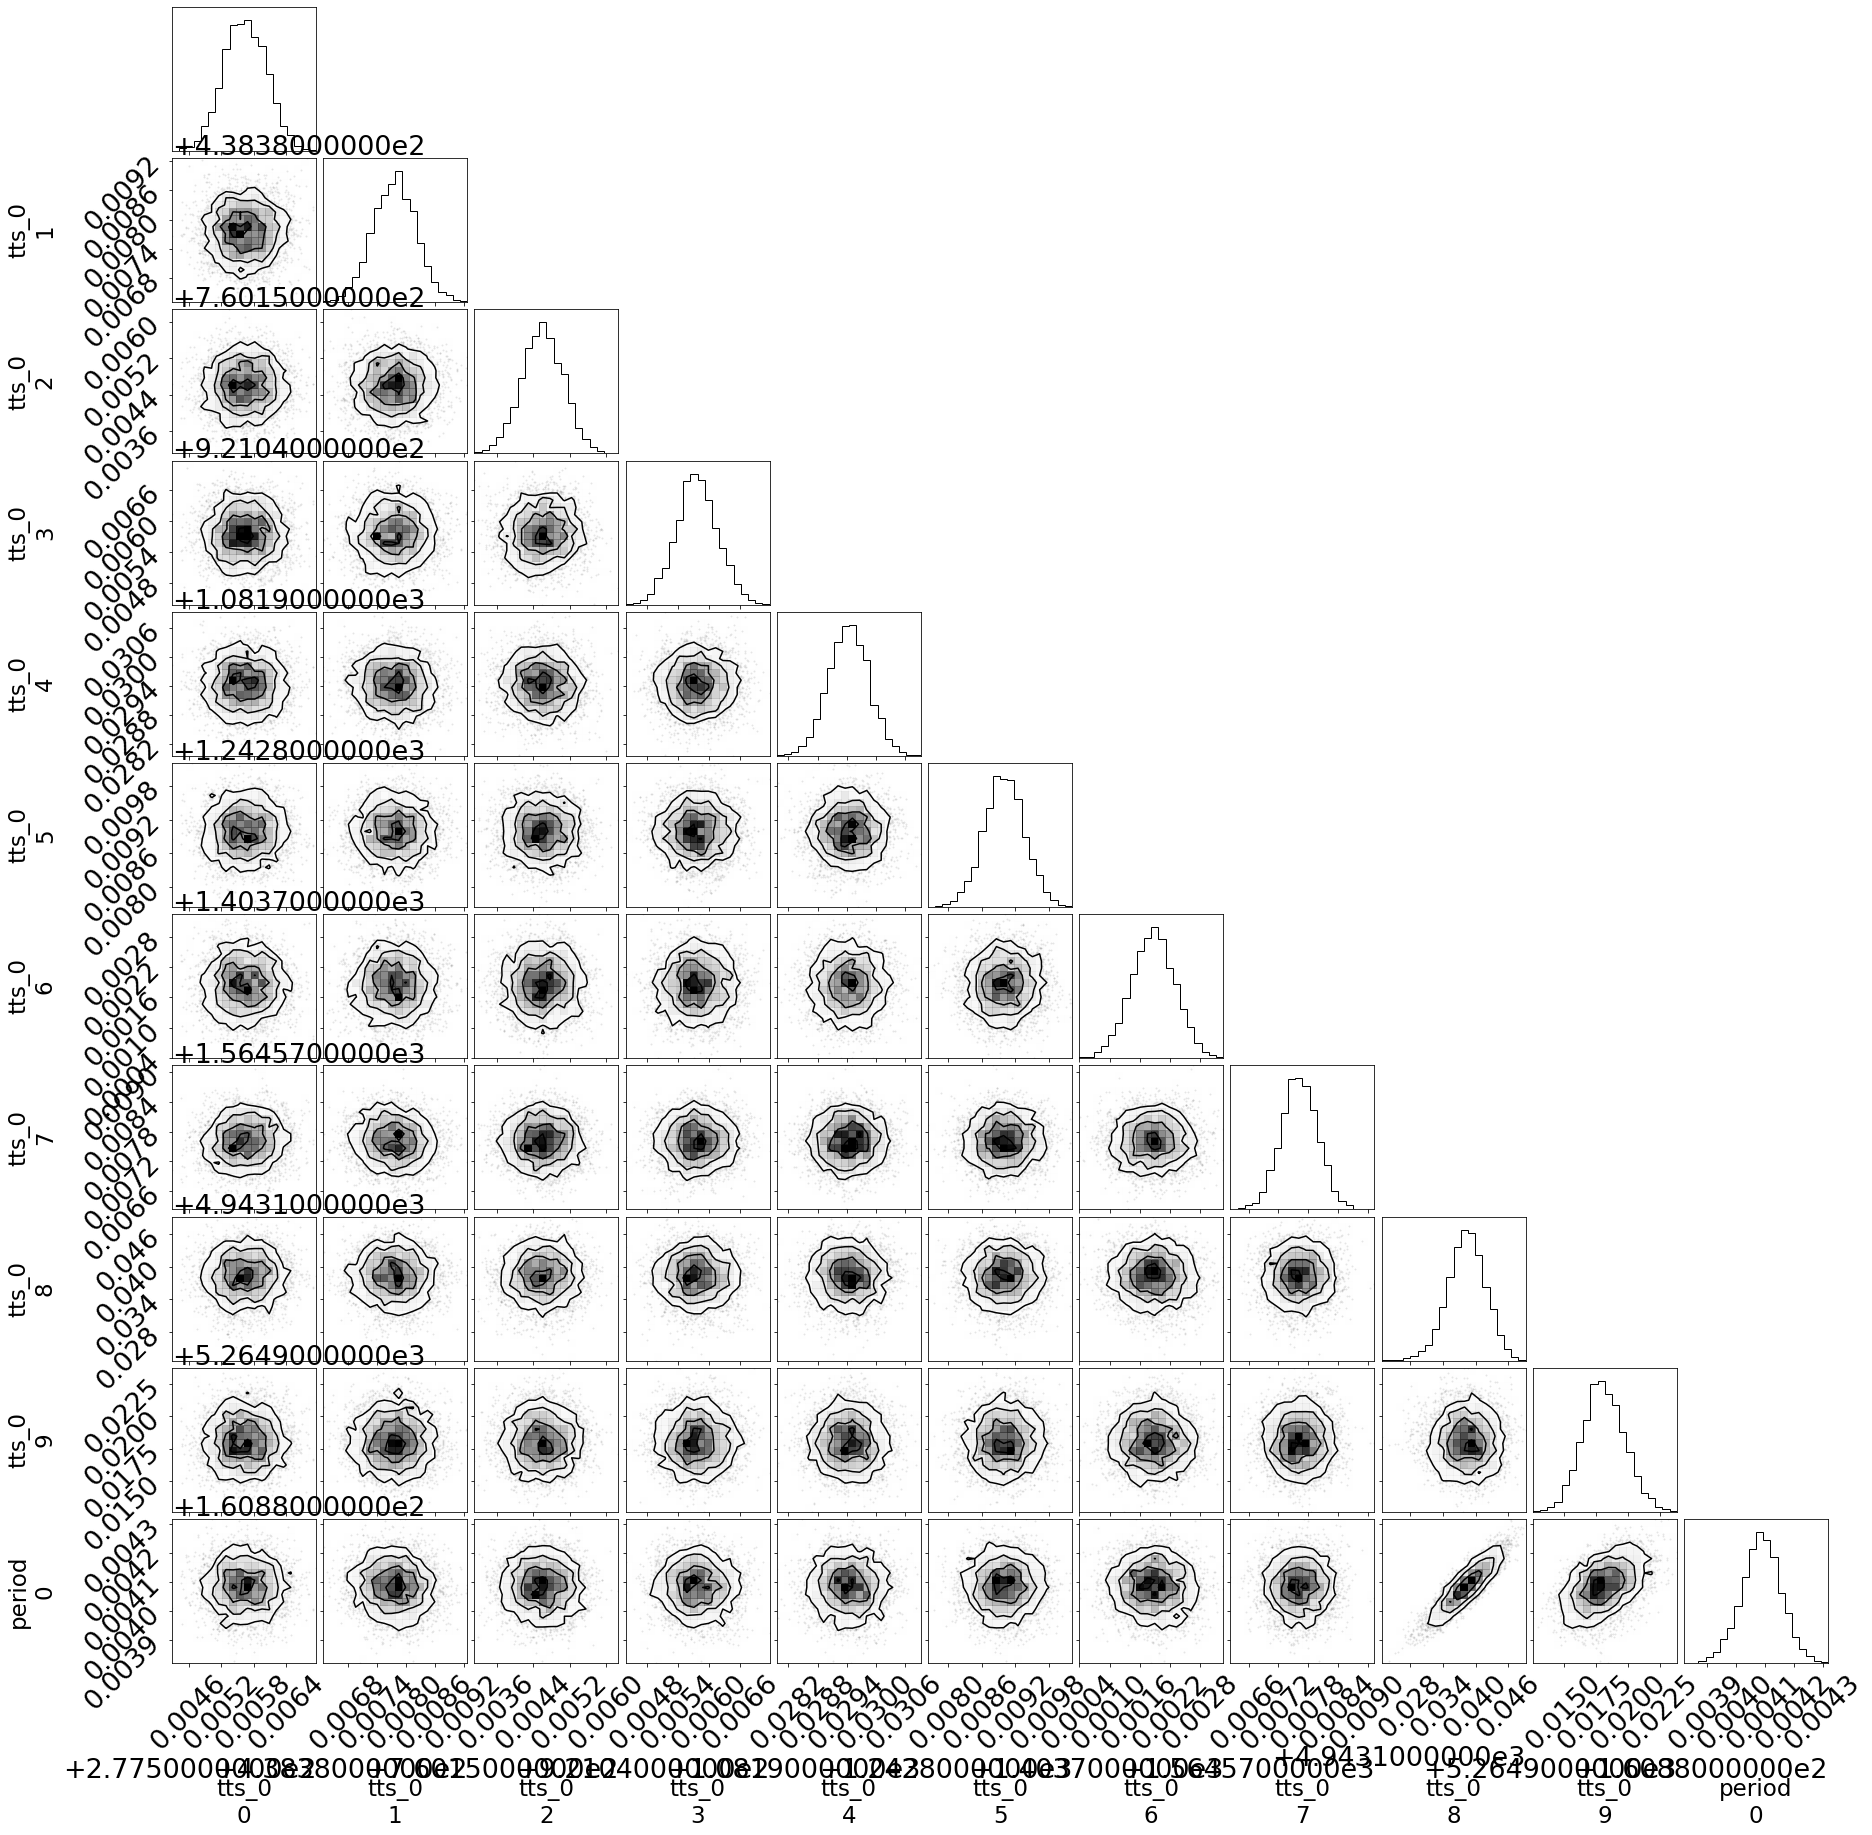

In [22]:
import corner
import matplotlib 
matplotlib.rc('text', usetex=False)


names = ["tts_0", "period"]

corner.corner(
    trace,
    var_names=names,
    label_kwargs={'fontsize':23}, labelpad=.5
)


fig.show()

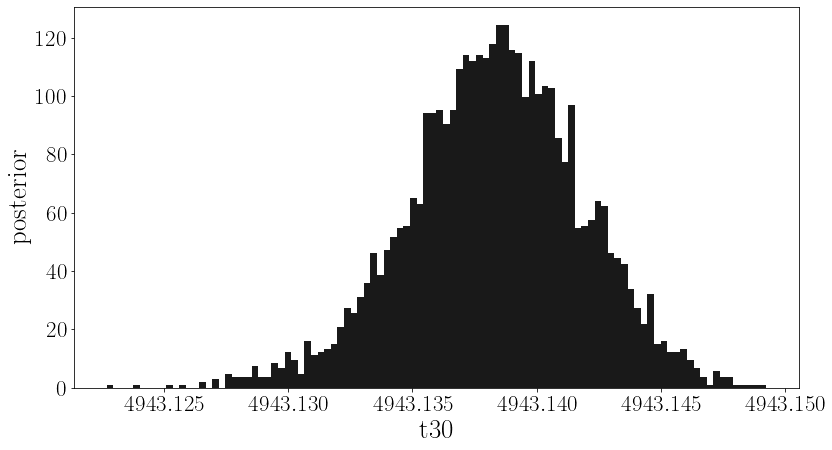

4943.1384 + 0.00334 - 0.00341


In [23]:
import matplotlib 
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23) 
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)
tt0_post = []

for ii in range(0, len(trans_inds)):
    tt0_post.append(np.array([]))
    for post in trace.posterior["tts_0"].values:
        tt0_post[ii] = np.append(tt0_post[ii], post[:,ii])
        


plt.figure(figsize=[13,7])       
        
plt.hist(tt0_post[ii-1], density=True, bins=100, color='k', alpha=0.9)
plt.ylabel('posterior', fontsize=27)
plt.xlabel('t30', fontsize=27)

plt.ticklabel_format(style='plain')    # to prevent scientific notation.
plt.ticklabel_format(useOffset=False)


plt.show()


t30_median = np.quantile(tt0_post[ii-1], 0.5)
t30_low = t30_median - np.quantile(tt0_post[ii-1], 0.16)
t30_high = np.quantile(tt0_post[ii-1], 0.84) - t30_median

print(str(np.round(t30_median, 5)) + ' + ' + str(np.round(t30_high, 5)) + ' - ' + str(np.round(t30_low, 5)))


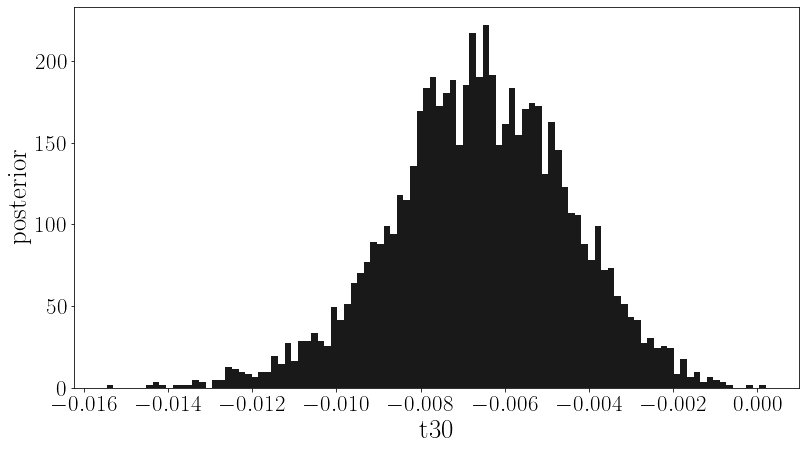

-0.00656 + 0.00205 - 0.00205


In [24]:
import matplotlib 
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23) 
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)
tt0_post = []

for ii in range(0, len(trans_inds)):
    tt0_post.append(np.array([]))
    for post in trace.posterior["ttvs_0"].values:
        tt0_post[ii] = np.append(tt0_post[ii], post[:,ii])
        


plt.figure(figsize=[13,7])       
        
plt.hist(tt0_post[ii-1], density=True, bins=100, color='k', alpha=0.9)
plt.ylabel('posterior', fontsize=27)
plt.xlabel('t30', fontsize=27)

plt.ticklabel_format(style='plain')    # to prevent scientific notation.
plt.ticklabel_format(useOffset=False)


plt.show()


t30_median = np.quantile(tt0_post[ii-1], 0.5)
t30_low = t30_median - np.quantile(tt0_post[ii-1], 0.16)
t30_high = np.quantile(tt0_post[ii-1], 0.84) - t30_median

print(str(np.round(t30_median, 5)) + ' + ' + str(np.round(t30_high, 5)) + ' - ' + str(np.round(t30_low, 5)))


In [25]:
tts_median = []
ttvs_median = []
t0_median = np.median(trace.posterior["t0"].values)

tts_err = []
ttvs_err = []
for ii in range(0, len(t0s)):
    tts = np.median(trace.posterior["tts_0"].values[:, :, ii])
    tts_median.append(tts)
    
    
    tts_quantile = [np.quantile(trace.posterior["tts_0"].values[:, :, ii], 0.16),
                    np.quantile(trace.posterior["tts_0"].values[:, :, ii], 0.84)]
    
    tts_err.append(np.array([
        tts - tts_quantile[0],
        tts_quantile[1] - tts
    ]))
    
    print(tts, tts_err[ii])
    

tts_err = np.array(tts_err).T




277.5056279571054 [0.00037534 0.00040132]
438.3877701232243 [0.00045058 0.00042884]
760.1546033967913 [0.00046111 0.00045595]
921.0457522675113 [0.00038826 0.00041212]
1081.9294412527865 [0.00041157 0.00040395]
1242.8089948589727 [0.00034869 0.00035472]
1403.7018577677827 [0.00043503 0.00043351]
1564.5776120989847 [0.00035384 0.00037547]
4943.138400360856 [0.00341239 0.00333904]
5264.918038527391 [0.0015492  0.00174123]


In [113]:
import math
def round_to_two_sigfigs(median, error):
    if error == 0:
        return "error!"
    
    # Calculate the exponent of the error
    exponent = int(math.floor(math.log10(abs(error))))
    
    # Calculate the divisor to scale the number to the desired significant figures
    divisor = 10 ** (exponent - 1)
    
    # Round the scaled number to the nearest integer
    rounded_median = round(median / divisor)
    rounded_error = round(error / divisor)

    # Scale the rounded number back to its original magnitude
    rounded_median *= divisor
    rounded_error *= divisor
    
    return str(rounded_median) + ' $\pm$ ' + str(rounded_error)

In [116]:
params = ["ror",
          "rho_star",
          "b",
          "Kepler_q1",
          "Kepler_q2",
          "TESS_q1",
          "TESS_q2",
          "TESS_blend",
          "tts_0",
          "t0",
          "period"]

rstar = 0.95 #rsun
for param in params:
    print(param)
    
    #ror is in terms of r_sun, r_* = 0.950 +/- 0.066 r_sun so multiply by this value
    if param == 'ror':
        print(str(np.median(trace.posterior[param].values)*rstar) + '  ' + str(np.std(trace.posterior[param].values)*rstar))
        print(round_to_two_sigfigs(np.median(trace.posterior[param].values)*rstar, np.std(trace.posterior[param].values)*rstar))
    if param not in ['tts_0', 'ror']:
        print(str(np.median(trace.posterior[param].values)) + '  ' + str(np.std(trace.posterior[param].values)))
        print(round_to_two_sigfigs(np.median(trace.posterior[param].values), np.std(trace.posterior[param].values)))

    if param == 'tts_0':
        for ii in range(0, len(trans_inds)):
            print(trans_inds[ii])
            print(str(np.median(trace.posterior[param].values.T[ii])) + '  ' + str(np.std(trace.posterior[param].values.T[ii])))
            print(round_to_two_sigfigs(np.median(trace.posterior[param].values.T[ii]), np.std(trace.posterior[param].values.T[ii])))
            print('')
    print('')        
            
            
from astropy.constants import R_sun, R_earth

rsun_to_rearth = R_sun/R_earth
print('rp')
print(str(np.median(trace.posterior['ror'].values)*rsun_to_rearth) + '  ' + str(np.std(trace.posterior['ror'].values)*rsun_to_rearth))


print(str(np.median(trace.posterior['ror'].values)*rsun_to_rearth) + 
      ' + ' + str((np.quantile(trace.posterior['ror'].values, 0.84)-np.median(trace.posterior['ror'].values))*rsun_to_rearth) +
      ' - ' + str((np.median(trace.posterior['ror'].values)-np.quantile(trace.posterior['ror'].values, 0.16))*rsun_to_rearth))


    

ror
0.07485008911317753  0.0002842255096576787
0.07485 $\pm$ 0.00028000000000000003

rho_star
1.3044790297691868  0.03761906612958116
1.304 $\pm$ 0.038

b
0.1061293931196676  0.07395039007567533
0.106 $\pm$ 0.074

Kepler_q1
0.45148095019990114  0.03994934262969574
0.451 $\pm$ 0.04

Kepler_q2
0.32336999048271886  0.02937687118554757
0.323 $\pm$ 0.029

TESS_q1
0.08665754582588982  0.12334425037040991
0.09 $\pm$ 0.12

TESS_q2
0.2045246686235455  0.24463042095826928
0.2 $\pm$ 0.24

TESS_blend
1.0000548853879105  2.8475411131221665e-05
1.000055 $\pm$ 2.8e-05

tts_0
0
277.5056279571054  0.00039362226857952304
277.50563 $\pm$ 0.00039000000000000005

1
438.3877701232243  0.0004462703579450488
438.38777000000005 $\pm$ 0.00045000000000000004

3
760.1546033967913  0.0004537469712977403
760.1546000000001 $\pm$ 0.00045000000000000004

4
921.0457522675113  0.0004017332352839158
921.0457500000001 $\pm$ 0.0004

5
1081.9294412527865  0.0004161381214822668
1081.92944 $\pm$ 0.00042

6
1242.8089948589727 

In [26]:
P_median = np.quantile(trace.posterior["period"].values, 0.5)
P_low = P_median - np.quantile(trace.posterior["period"].values, 0.16)
P_high = np.quantile(trace.posterior["period"].values, 0.84) - P_median

print(str(np.round(P_median, 5)) + ' + ' + str(np.round(P_high, 5)) + ' - ' + str(np.round(P_low, 5)))

t0_median = np.quantile(trace.posterior["t0"].values, 0.5)
t0_low = t0_median - np.quantile(trace.posterior["t0"].values, 0.16)
t0_high = np.quantile(trace.posterior["t0"].values, 0.84) - t0_median

print(str(np.round(t0_median, 5)) + ' + ' + str(np.round(t0_high, 5)) + ' - ' + str(np.round(t0_low, 5)))

#t0_median = 277.50640136

linear_ephemeris = []
for epoch in trans_inds:
    linear_ephemeris.append(t0_median+P_median*epoch)
    
    
ttvs_median = []
for ii in range(0, len(linear_ephemeris)):
    ti_o = tts_median[ii]
    ti_c = linear_ephemeris[ii]
    
    
    ttvs_median.append(ti_o-ti_c)
    
ttvs_median = np.array(ttvs_median)*24*60

print(ttvs_median)

160.88409 + 7e-05 - 7e-05
277.50639 + 0.00032 - 0.0003
[-1.10141205 -3.9033163  -5.83664928  4.3311011   3.75661644 -2.77281411
  9.86315112 -2.13723541 -9.42123092  7.08448197]


In [46]:
trace.log_likelihood

<xarray.Dataset>
Dimensions:              (chain: 2, draw: 2000, Kepler_obs_dim_0: 1807,
                          BARON_obs_dim_0: 96, TESS_obs_dim_0: 3571,
                          LCO Teide_obs_dim_0: 146, Whitin_obs_dim_0: 455)
Coordinates:
  * chain                (chain) int64 0 1
  * draw                 (draw) int64 0 1 2 3 4 5 ... 1995 1996 1997 1998 1999
  * Kepler_obs_dim_0     (Kepler_obs_dim_0) int64 0 1 2 3 ... 1804 1805 1806
  * BARON_obs_dim_0      (BARON_obs_dim_0) int64 0 1 2 3 4 5 ... 91 92 93 94 95
  * TESS_obs_dim_0       (TESS_obs_dim_0) int64 0 1 2 3 ... 3567 3568 3569 3570
  * LCO Teide_obs_dim_0  (LCO Teide_obs_dim_0) int64 0 1 2 3 ... 142 143 144 145
  * Whitin_obs_dim_0     (Whitin_obs_dim_0) int64 0 1 2 3 4 ... 451 452 453 454
Data variables:
    Kepler_obs           (chain, draw, Kepler_obs_dim_0) float64 7.373 ... 8.249
    BARON_obs            (chain, draw, BARON_obs_dim_0) float64 4.429 ... -1.339
    TESS_obs             (chain, draw, TESS_obs_dim_0) float64 5.124 ... 4.928
    LCO Teide_obs        (chain, draw, LCO Teide_obs_dim_0) float64 3.355 ......
    Whitin_obs           (chain, draw, Whitin_obs_dim_0) float64 3.621 ... 3.658
Attributes:
    created_at:                 2023-06-20T23:27:22.977193
    arviz_version:              0.12.0
    inference_library:          pymc3
    inference_library_version:  3.11.5

In [51]:
az.to_netcdf(trace.posterior, './transit_model_final_posterior.out')

'./transit_model_final_posterior.out'

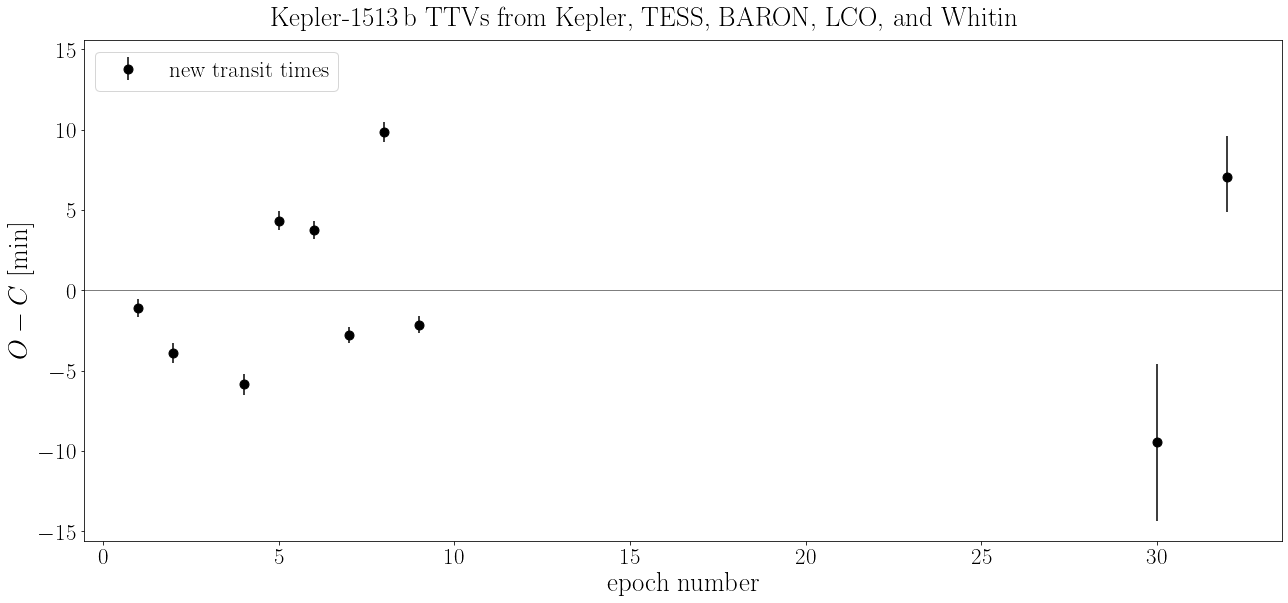

In [53]:
import pandas as pd

#kepler_ttvs = pd.read_csv('./koi-3678_TTVs_all_TESS.csv')

#flat_samps = trace.posterior.stack(sample=("chain", "draw"))

fig, ax1 = plt.subplots(1, 1, figsize=(18, 8.5), sharex=True)

ax1.errorbar(np.array(trans_inds)+1, ttvs_median, yerr = tts_err*24.*60., 
             ls = '', marker = 'o', color = 'k', markersize=9, label = 'new transit times')

ax1.axhline(0, color="k", lw=0.5)
ax1.set_ylim(np.max(np.abs(ax1.get_ylim())) * np.array([-1, 1]))

ax1.set_ylabel("$O-C$ [min]", fontsize=27)
ax1.set_xlabel("epoch number", fontsize=27)

fig.suptitle(r"Kepler-1513\,b TTVs from Kepler, TESS, BARON, LCO, and Whitin", fontsize=27)

fig.tight_layout()
plt.legend(fontsize=23, loc=2)
#fig.savefig('./kepler1513_TTVs_new.pdf')



In [54]:
import pandas as pd

detrend_dict = {}

detrend_dict["epochs"] = trans_inds
detrend_dict["times"] = tts_median
detrend_dict["ttvs"] = ttvs_median
detrend_dict["times_low_err"] = tts_err[0]
detrend_dict["times_high_err"] = tts_err[1]
    
detrend_df = pd.DataFrame(detrend_dict)

detrend_df.to_csv('./kepler1513_ttvs_new.csv', index=False)

In [55]:
def q1(u1, u2):
    return (u1+u2)**2.

def q2(u1, u2):
    return u1/(2.*(u1+u2))

In [56]:
def u1(q1, q2):
    return 2*np.sqrt(q1)*q2
def u2(q1, q2):
    return np.sqrt(q1)*(1-(2*q2))

In [57]:
print('BARON')
print(BARON_u1, BARON_u2)
print(np.round(q1(BARON_u1, BARON_u2), 3), np.round(q2(BARON_u1, BARON_u2), 3))
print(u1(q1(BARON_u1, BARON_u2), q2(BARON_u1, BARON_u2)), u2(q1(BARON_u1, BARON_u2), q2(BARON_u1, BARON_u2)))

print('')

print('Whitin')
print(Whitin_u1, Whitin_u2)
print(np.round(q1(Whitin_u1, Whitin_u2), 4), np.round(q2(Whitin_u1, Whitin_u2), 4))
print(u1(q1(Whitin_u1, Whitin_u2), q2(Whitin_u1, Whitin_u2)), u2(q1(Whitin_u1, Whitin_u2), q2(Whitin_u1, Whitin_u2)))

print('')

print('LCO Teide')
print(LCO_u1, LCO_u2)
print(np.round(q1(LCO_u1, LCO_u2), 3), np.round(q2(LCO_u1, LCO_u2), 3))
print(u1(q1(LCO_u1, LCO_u2), q2(LCO_u1, LCO_u2)), u2(q1(LCO_u1, LCO_u2), q2(LCO_u1, LCO_u2)))


BARON
0.381 0.2272
0.37 0.313
0.381 0.22720000000000007

Whitin
0.4498 0.2232
0.4529 0.3342
0.4498 0.22320000000000004

LCO Teide
0.381 0.2272
0.37 0.313
0.381 0.22720000000000007


In [60]:
loaded_posterior = az.from_netcdf('./transit_model_final_posterior.out')
loaded_posterior

Inference data with groups:
	> posterior